In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# New section

In [2]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


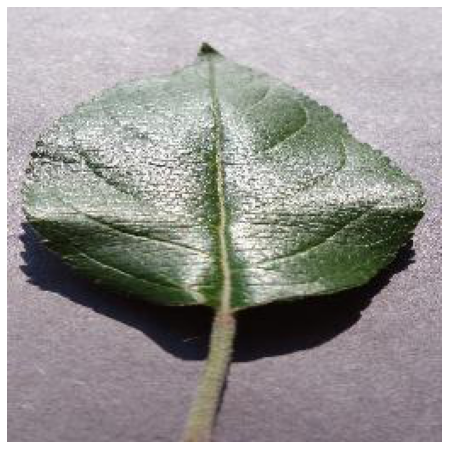

In [15]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

I = Image.open("/content/drive/MyDrive/HCI_REC/0a02e8cb-b715-497f-a16a-c28b3409f927___RS_HL 7432.JPG")

plt.figure(figsize=(8,8))
plt.imshow(I)
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


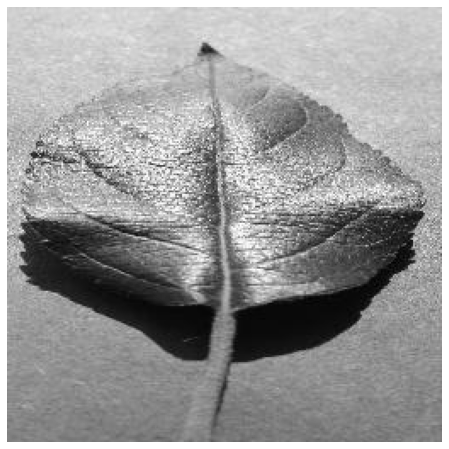

In [17]:
I1 = I.convert('L')
a = np.asarray(I1,dtype=np.float)

plt.figure(figsize=(8,8))
plt.imshow(a,cmap='gray')
plt.axis('off')
plt.show()

In [18]:
x , y = a.shape
print('a shape ', a.shape)

a1 = a.reshape(x*y,1)
print('a1 shape ', a1.shape)

a shape  (256, 256)
a1 shape  (65536, 1)


In [19]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2)
k_means.fit(a1) 

KMeans(n_clusters=2)

In [20]:
centroids = k_means.cluster_centers_
labels = k_means.labels_

In [21]:
a2 = centroids[labels]
print('a2 shape ', a2.shape)

a2 shape  (65536, 1)


In [22]:
a3 = a2.reshape(x, y)
print('a3 shape ', a3.shape)

a3 shape  (256, 256)


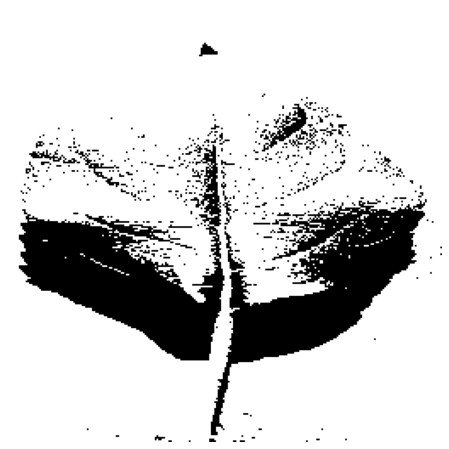

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(a3,cmap='gray')
plt.axis('off')
plt.show()

In [24]:
a4 = (a3 -  np.min(a3))/(np.max(a3)-np.min(a3))*255
a5 = a4.astype(np.uint8)
I2 = Image.fromarray(a5)
w, h =I2.size
colors = I2.getcolors(w * h)
print(colors)

[(12923, 0), (52613, 255)]


In [25]:
print ('Area = ',  float(210000)*float(colors[0][0])/float(w*h), 'km2')

Area =  41409.759521484375 km2


In [26]:
print ('Area = ',  (float(colors[0][0])/float(w*h))*100, '%')

Area =  19.71893310546875 %
